## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


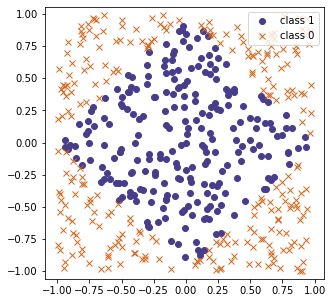

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def accuracy_fn(y_true, y_pred):
    """
    Accuracy function
    """
    acertos = 0
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            acertos += 1
    return acertos/len(y_true)

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient



def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

Complete the pseudocode below

_____________________________
## Diamond Pattern

Para uma melhor análise, fixamos os valores de W1 e W2 iniciais iguais para todos os padrões, assim conseguimos estabelecer um padrão comparativo melhor.

In [4]:
np.random.seed(1241)
W_1_default = np.random.uniform(-1,1, (3,4))
W_2_default = np.random.uniform(-1,1, 4)

It:  200
Loss:  0.5140005581973099
Accuracy:  0.0
It:  400
Loss:  0.4960777249262527
Accuracy:  0.0
It:  600
Loss:  0.48951626373573653
Accuracy:  0.0
It:  800
Loss:  0.4857243670732403
Accuracy:  0.0
It:  1000
Loss:  0.4831496477843542
Accuracy:  0.0
It:  1200
Loss:  0.4812427745381544
Accuracy:  0.0
It:  1400
Loss:  0.4797508110845011
Accuracy:  0.0
It:  1600
Loss:  0.47853854191289585
Accuracy:  0.0
It:  1800
Loss:  0.47752609428222853
Accuracy:  0.0
It:  2000
Loss:  0.4766627367455743
Accuracy:  0.0
It:  2200
Loss:  0.475914413525438
Accuracy:  0.0
It:  2400
Loss:  0.47525724357243393
Accuracy:  0.0
It:  2600
Loss:  0.47467387986641507
Accuracy:  0.0
It:  2800
Loss:  0.4741513505790579
Accuracy:  0.0
It:  3000
Loss:  0.4736797173506928
Accuracy:  0.0
It:  3200
Loss:  0.4732512079116362
Accuracy:  0.0
It:  3400
Loss:  0.47285963623210814
Accuracy:  0.0
It:  3600
Loss:  0.47250000351440025
Accuracy:  0.0
It:  3800
Loss:  0.4721682166180109
Accuracy:  0.0
It:  4000
Loss:  0.4718608849

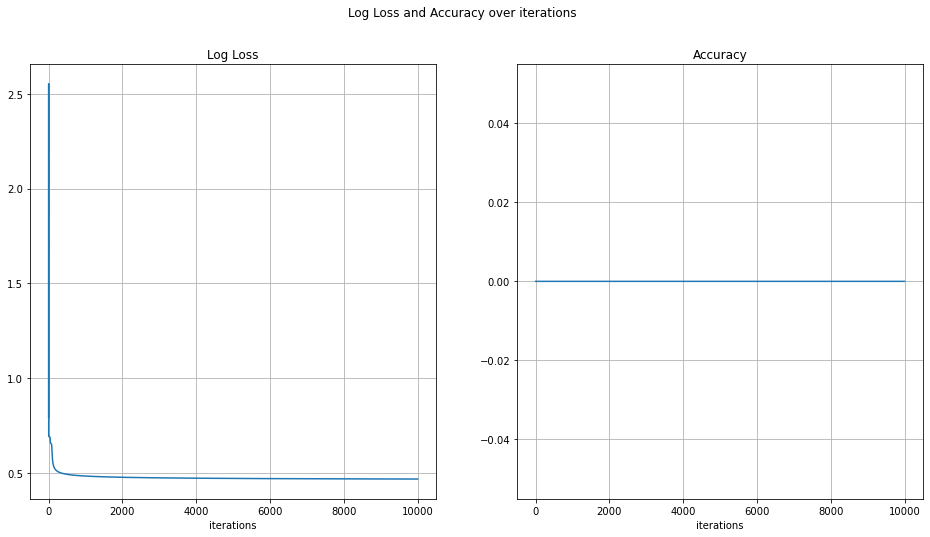

In [5]:
#### Initialize the network parameters
W_1 = W_1_default
W_2 = W_2_default
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

_______________________________
## Circle Pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


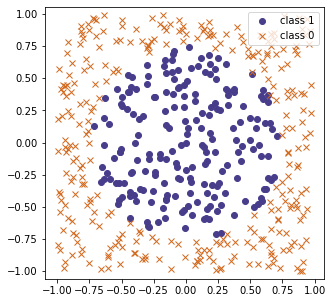

In [6]:
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.43189125325977284
Accuracy:  0.0
It:  400
Loss:  0.42243543047673676
Accuracy:  0.0
It:  600
Loss:  0.4184716229398205
Accuracy:  0.0
It:  800
Loss:  0.41614781333891576
Accuracy:  0.0
It:  1000
Loss:  0.4145791123883256
Accuracy:  0.0
It:  1200
Loss:  0.4134312550497873
Accuracy:  0.0
It:  1400
Loss:  0.4125464841316084
Accuracy:  0.0
It:  1600
Loss:  0.4118392243120685
Accuracy:  0.0
It:  1800
Loss:  0.4112584142426999
Accuracy:  0.0
It:  2000
Loss:  0.41077140823991043
Accuracy:  0.0
It:  2200
Loss:  0.4103562131996541
Accuracy:  0.0
It:  2400
Loss:  0.40999739198545226
Accuracy:  0.0
It:  2600
Loss:  0.40968374544963226
Accuracy:  0.0
It:  2800
Loss:  0.4094069255006235
Accuracy:  0.0
It:  3000
Loss:  0.40916056632065073
Accuracy:  0.0
It:  3200
Loss:  0.40893971892815695
Accuracy:  0.0
It:  3400
Loss:  0.4087404710533981
Accuracy:  0.0
It:  3600
Loss:  0.4085596843877105
Accuracy:  0.0
It:  3800
Loss:  0.40839480850259396
Accuracy:  0.0
It:  4000
Loss:  0.4082437

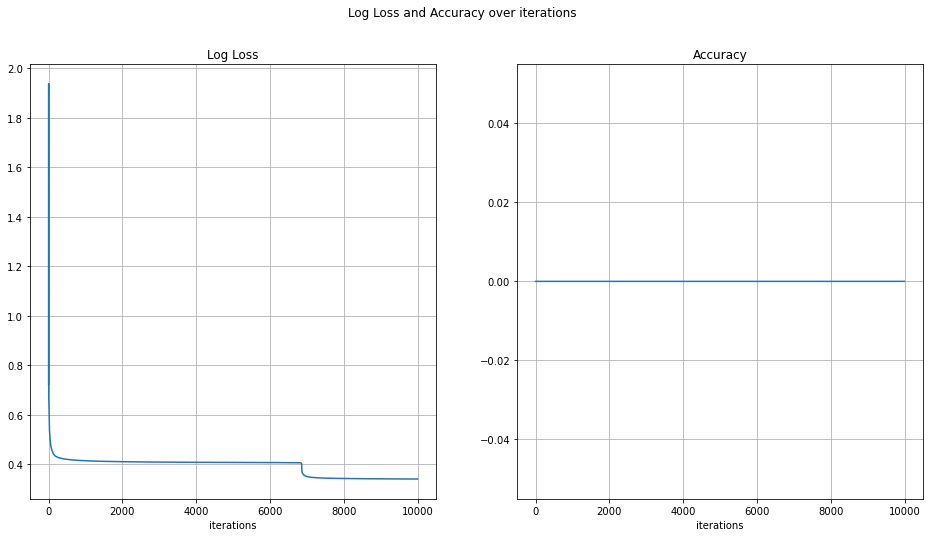

In [7]:
#### Initialize the network parameter
W_1 = W_1_default
W_2 = W_2_default
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

______________________________
## Centered Pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


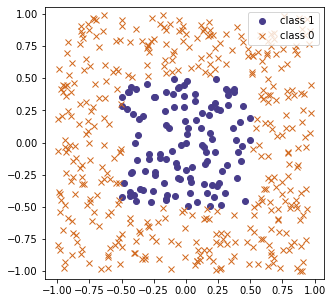

In [8]:
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.2799716487481243
Accuracy:  0.0
It:  400
Loss:  0.2208079799805239
Accuracy:  0.0
It:  600
Loss:  0.20659772265609702
Accuracy:  0.0
It:  800
Loss:  0.2007837028377886
Accuracy:  0.0
It:  1000
Loss:  0.1972132803528788
Accuracy:  0.0
It:  1200
Loss:  0.19471568265948352
Accuracy:  0.0
It:  1400
Loss:  0.1928339165138533
Accuracy:  0.0
It:  1600
Loss:  0.19134478853812084
Accuracy:  0.0
It:  1800
Loss:  0.19012421666950344
Accuracy:  0.0
It:  2000
Loss:  0.18909695367429147
Accuracy:  0.0
It:  2200
Loss:  0.18821439311182306
Accuracy:  0.0
It:  2400
Loss:  0.187443579278237
Accuracy:  0.0
It:  2600
Loss:  0.1867612851383558
Accuracy:  0.0
It:  2800
Loss:  0.1861506083442858
Accuracy:  0.0
It:  3000
Loss:  0.18559891296787065
Accuracy:  0.0
It:  3200
Loss:  0.18509653287510477
Accuracy:  0.0
It:  3400
Loss:  0.1846359263408529
Accuracy:  0.0
It:  3600
Loss:  0.18421110816208627
Accuracy:  0.0
It:  3800
Loss:  0.18381725787475184
Accuracy:  0.0
It:  4000
Loss:  0.1834504

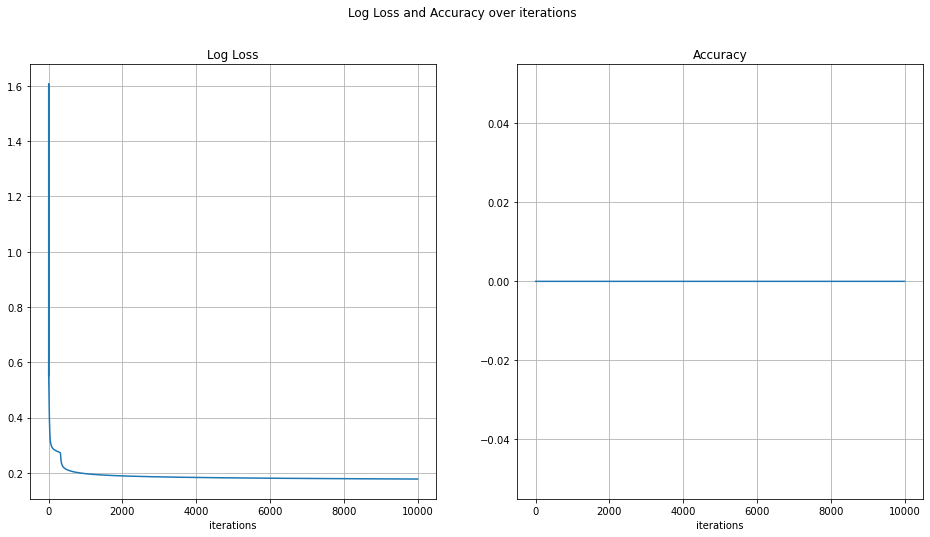

In [9]:
#### Initialize the network parameters
W_1 = W_1_default
W_2 = W_2_default
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

_______________________________
## Thick Right Angle pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


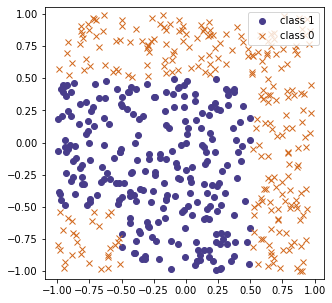

In [10]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.21969792789624398
Accuracy:  0.0
It:  400
Loss:  0.2048577780490572
Accuracy:  0.0
It:  600
Loss:  0.2009574856112854
Accuracy:  0.0
It:  800
Loss:  0.19888184310518706
Accuracy:  0.0
It:  1000
Loss:  0.19736711854381156
Accuracy:  0.0
It:  1200
Loss:  0.19611286795591934
Accuracy:  0.0
It:  1400
Loss:  0.19499406928382235
Accuracy:  0.0
It:  1600
Loss:  0.19395599881973263
Accuracy:  0.0
It:  1800
Loss:  0.19297883787872075
Accuracy:  0.0
It:  2000
Loss:  0.19205867960615317
Accuracy:  0.0
It:  2200
Loss:  0.19119714336392926
Accuracy:  0.0
It:  2400
Loss:  0.19039695602246648
Accuracy:  0.0
It:  2600
Loss:  0.1896615463281467
Accuracy:  0.0
It:  2800
Loss:  0.18899561916942512
Accuracy:  0.0
It:  3000
Loss:  0.1884032364539936
Accuracy:  0.0
It:  3200
Loss:  0.18788369527780735
Accuracy:  0.0
It:  3400
Loss:  0.18742908415369935
Accuracy:  0.0
It:  3600
Loss:  0.18702201654523712
Accuracy:  0.0
It:  3800
Loss:  0.18661453645193976
Accuracy:  0.0
It:  4000
Loss:  0.1

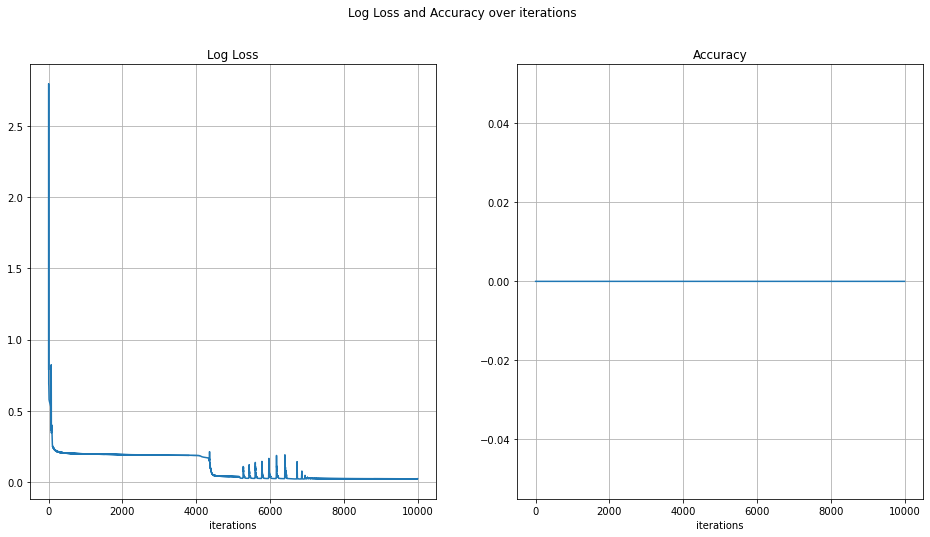

In [11]:
#### Initialize the network parameters
W_1 = W_1_default
W_2 = W_2_default
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

_________________________
## Thin right angle pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


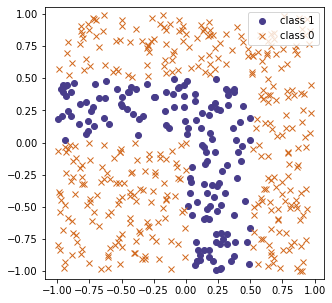

In [12]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.4372812846163973
Accuracy:  0.0
It:  400
Loss:  0.3161733411096327
Accuracy:  0.0
It:  600
Loss:  0.18183998243804492
Accuracy:  0.0
It:  800
Loss:  0.11744059506231483
Accuracy:  0.0
It:  1000
Loss:  0.10333707173575615
Accuracy:  0.0
It:  1200
Loss:  0.0973850043510923
Accuracy:  0.0
It:  1400
Loss:  0.0914740760605677
Accuracy:  0.0
It:  1600
Loss:  0.0909587475105281
Accuracy:  0.0
It:  1800
Loss:  0.0778935469271479
Accuracy:  0.0
It:  2000
Loss:  0.08687487971093322
Accuracy:  0.0
It:  2200
Loss:  0.09585359336300352
Accuracy:  0.0
It:  2400
Loss:  0.09065988144059232
Accuracy:  0.0
It:  2600
Loss:  0.08023237598197826
Accuracy:  0.0
It:  2800
Loss:  0.08689855930610912
Accuracy:  0.0
It:  3000
Loss:  0.07639543897577362
Accuracy:  0.0
It:  3200
Loss:  0.08604617376018169
Accuracy:  0.0
It:  3400
Loss:  0.0822263290097208
Accuracy:  0.0
It:  3600
Loss:  0.0909838962322882
Accuracy:  0.0
It:  3800
Loss:  0.08253862069109709
Accuracy:  0.0
It:  4000
Loss:  0.19649

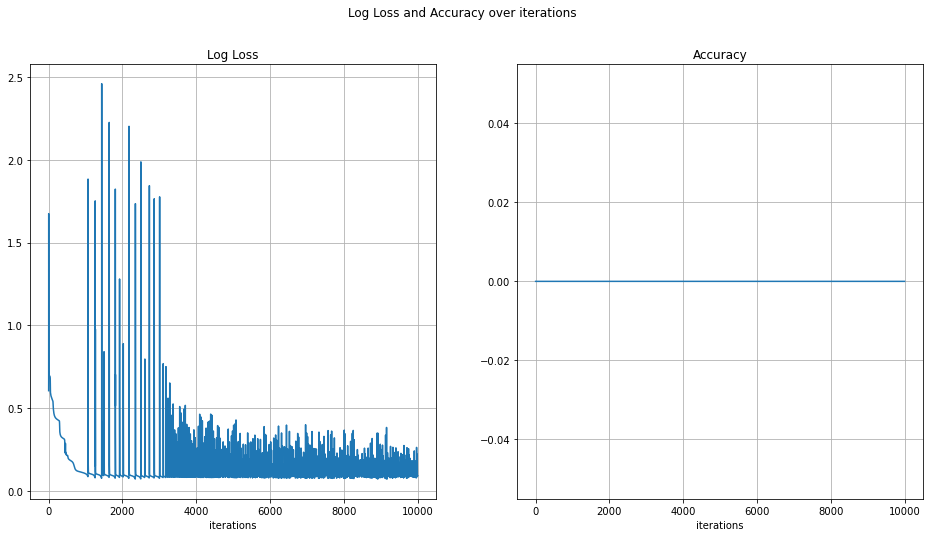

In [13]:
#### Initialize the network parameters
W_1 = W_1_default
W_2 = W_2_default
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

___________________________
## Análise de Resultados

### Análise dos padrões

Para analisar os padrões, fixamos os valores do número de iterações em 10000 e a taxa de aprendizado de 5% e medimos para os diferentes padrões dados: diamante, círculo, central, thick right angle e thin right angle. Como foi possível observar, o algoritmo teve pior desempenho com o padrão de Diamante, tendo um log loss de 0.43, aproximadamente, e o melhor padrão foi o Thick Right Angle, com um log loss de 0.02. Outra coisa que podemos observar é a instabilidade existente nos gráficos do thin e do thick right angle para calcular o log loss. 

### Análise da taxa de aprendizagem e do número de iterações
Inicialmente, usando somente o padrão Diamante para fazer a análise. Desta forma iremos variar os valores de taxa de aprendizado e número de iterações e medir os resultados encontrados.

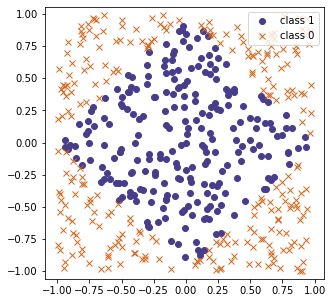

In [22]:
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

#### Taxa de aprendizagem

--------------------------------
Learning Rate:  0.05
It:  10000
Loss:  0.46746601248130665
Accuracy:  0.0
--------------------------------
Learning Rate:  0.1
It:  10000
Loss:  0.46424727237296004
Accuracy:  0.0
--------------------------------
Learning Rate:  0.3
It:  10000
Loss:  0.466435192081683
Accuracy:  0.0
--------------------------------
Learning Rate:  0.5
It:  10000
Loss:  0.47303808469798214
Accuracy:  0.0
--------------------------------
Learning Rate:  0.7
It:  10000
Loss:  0.5254619718226597
Accuracy:  0.0


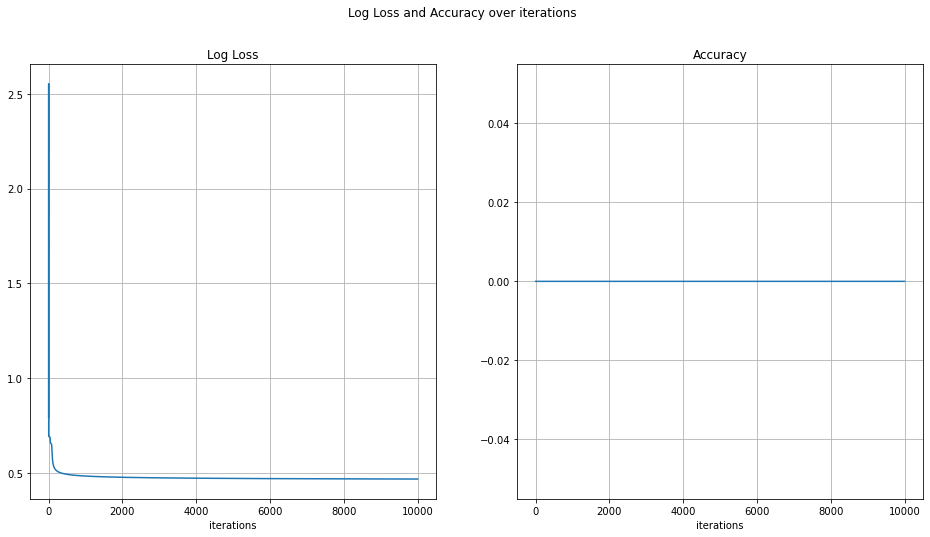

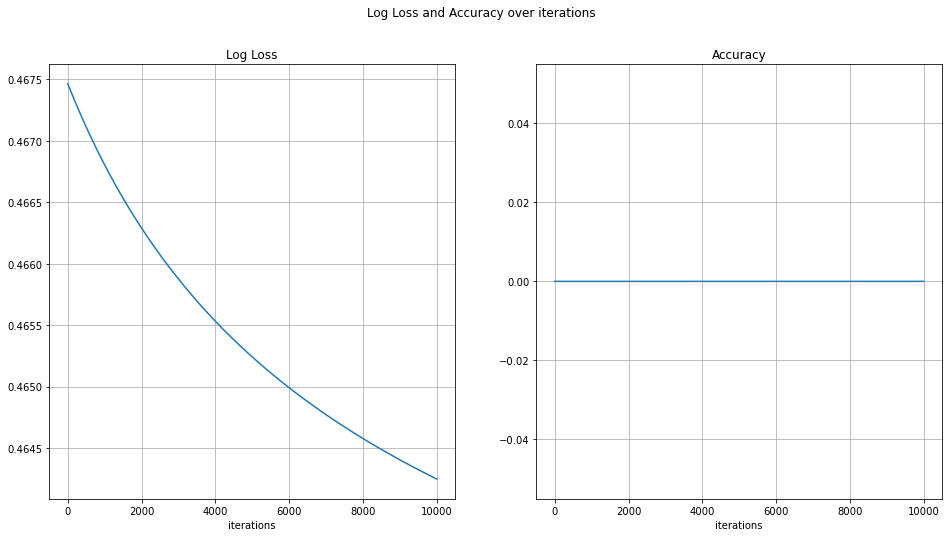

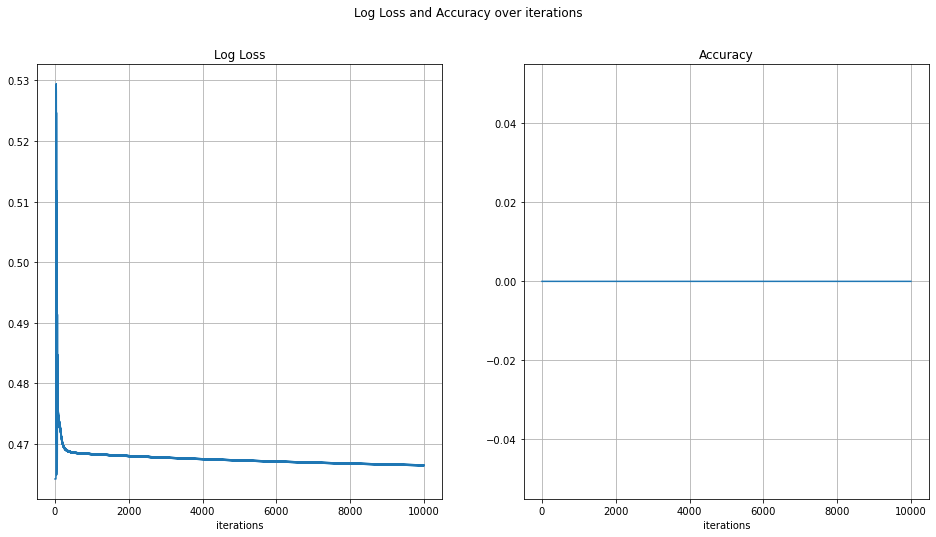

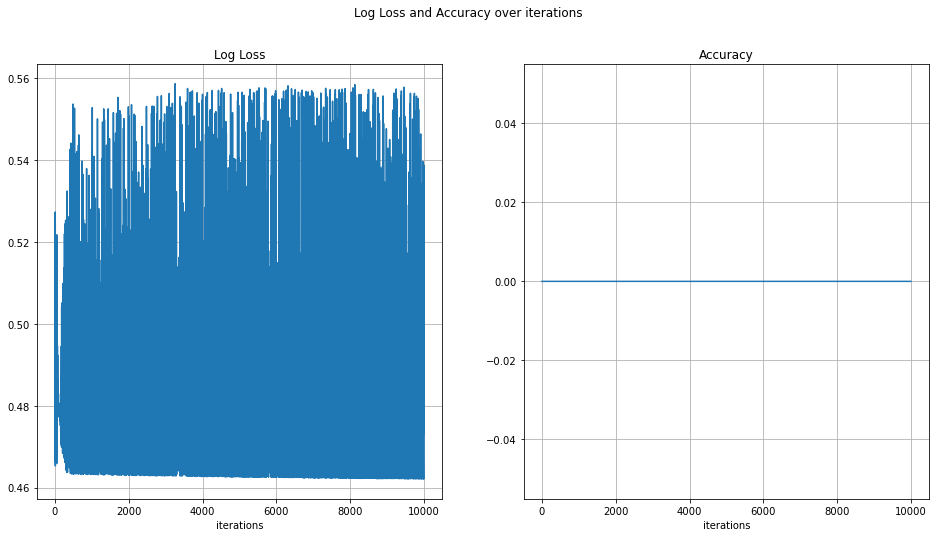

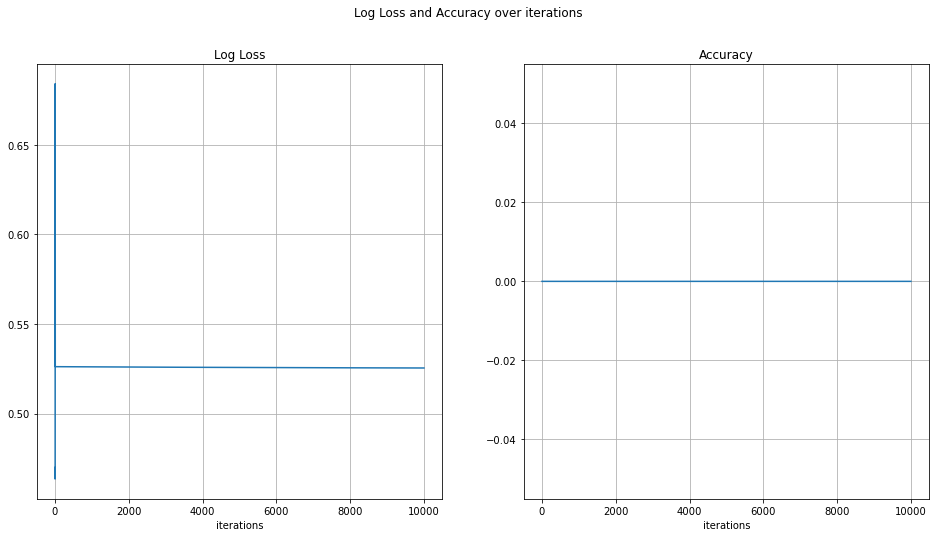

In [23]:
#### Initialize the network parameters
W_1 = W_1_default
W_2 = W_2_default
num_iter = 10000
learning_rates = [0.05, 0.1, 0.3, 0.5, 0.7]
x_mat = x_mat_full

for learning_rate in learning_rates:
    print('--------------------------------')
    print('Learning Rate: ', learning_rate)
    loss_vals, accuracies = [], []
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1,W_2)
        ## Update the weight matrices
        W_1 = W_1 - learning_rate*gradient[0]
        W_2 = W_2 - learning_rate*gradient[1]
        
        ### Compute the loss and accuracy
        accuracy = accuracy_fn(y, y_pred)
        accuracies.append(accuracy)
        
        loss = loss_fn(y, y_pred)
        loss_vals.append(loss)
        
        ## Print the loss and accuracy for every 200th iteration
        if((i+1) % 10000 == 0):
            print("==============================")
            print("It: ", str(i+1))
            print("Loss: ", str(loss))
            print("Accuracy: ", str(accuracy))
        
    plot_loss_accuracy(loss_vals, accuracies)

Observando as taxas de aprendizado utilizadas, notamos que a taxa de erro encontrada foi menor quando usamos a taxa de 10%. Ao usarmos uma taxa menor (5%), obtivemos um erro ligeiramente maior do que para a taxa de 10%. Quando usamos uma taxa de 50%, notamos uma instabilidade no log loss.

#### Número de iterações

--------------------------------
Numero de iterações:  100
It:  100
Loss:  0.5900727070195215
Accuracy:  0.0
--------------------------------
Numero de iterações:  500
It:  500
Loss:  0.48951626373573653
Accuracy:  0.0
--------------------------------
Numero de iterações:  1000
It:  1000
Loss:  0.47853854191289585
Accuracy:  0.0
--------------------------------
Numero de iterações:  3000
It:  3000
Loss:  0.47105936495274603
Accuracy:  0.0
--------------------------------
Numero de iterações:  7000
It:  7000
Loss:  0.46692294371595383
Accuracy:  0.0
--------------------------------
Numero de iterações:  10000
It:  10000
Loss:  0.4650379453695187
Accuracy:  0.0


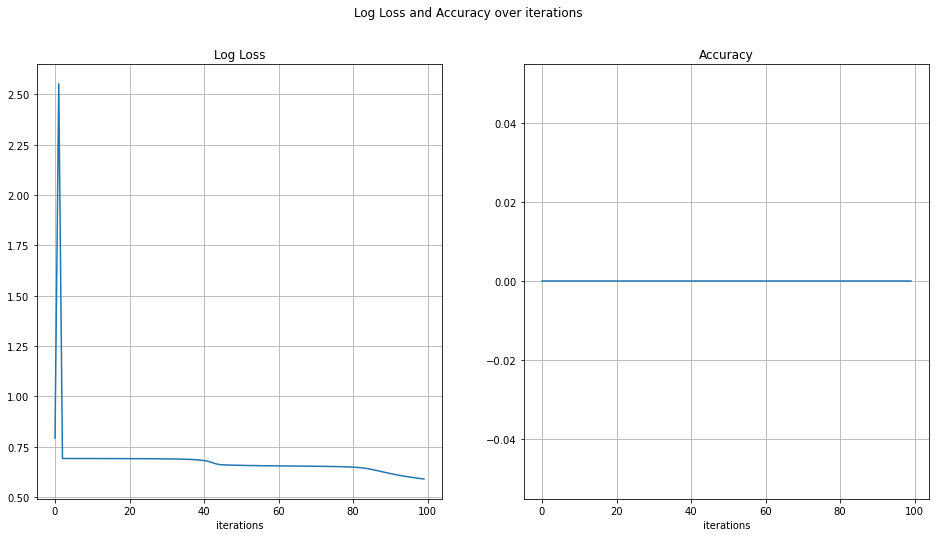

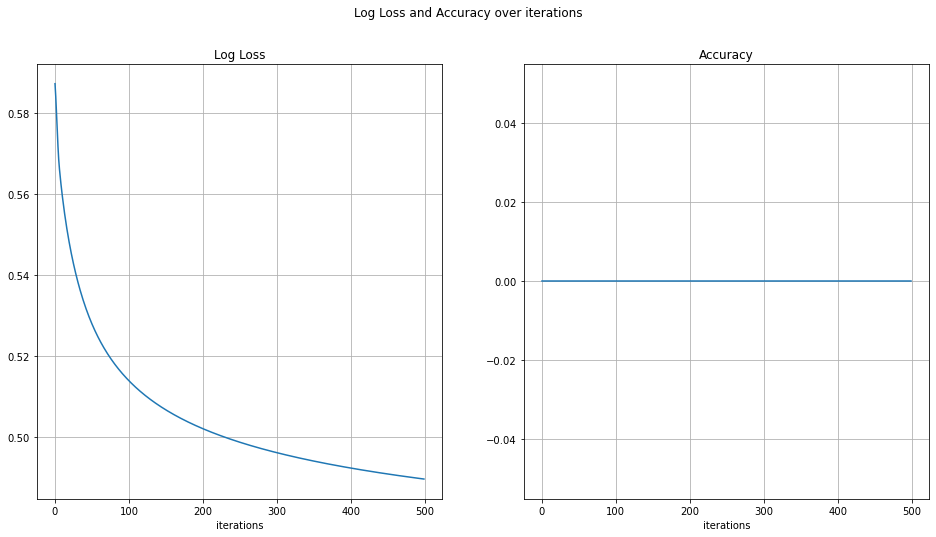

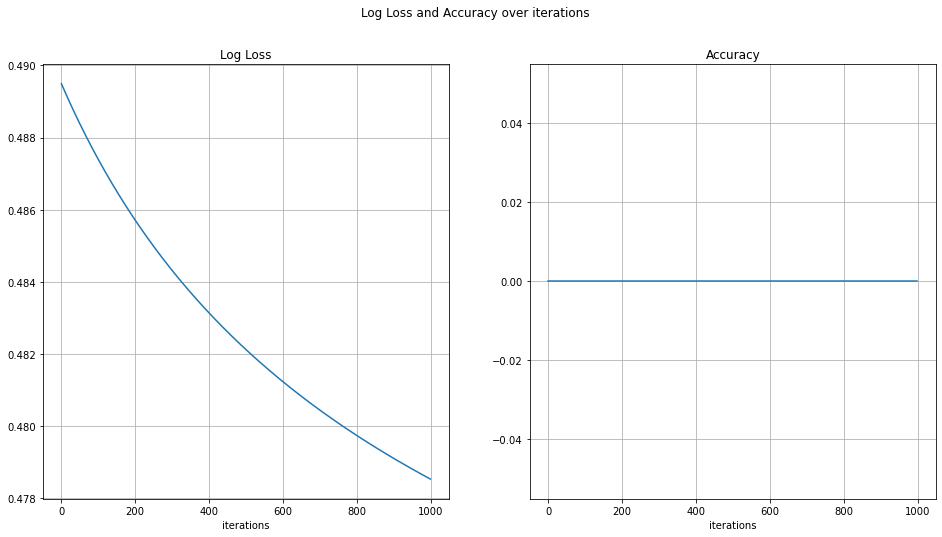

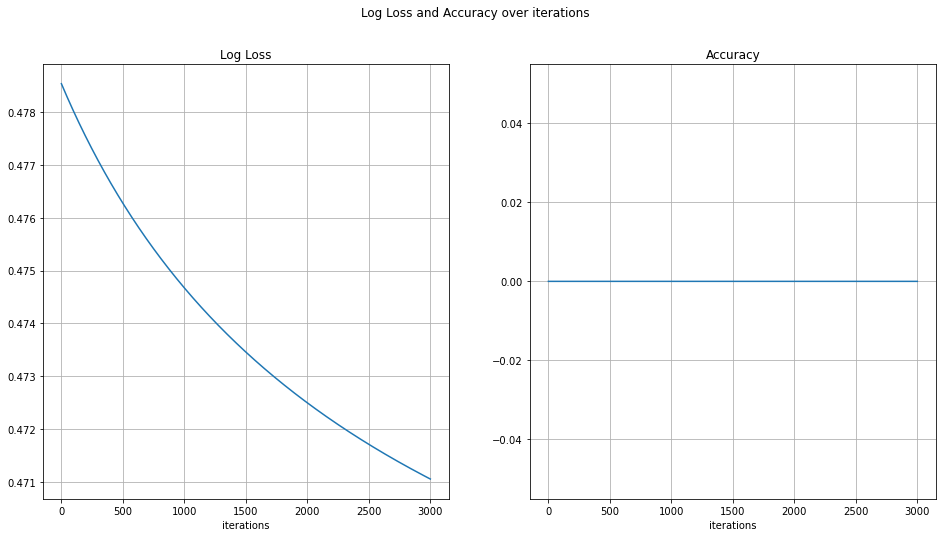

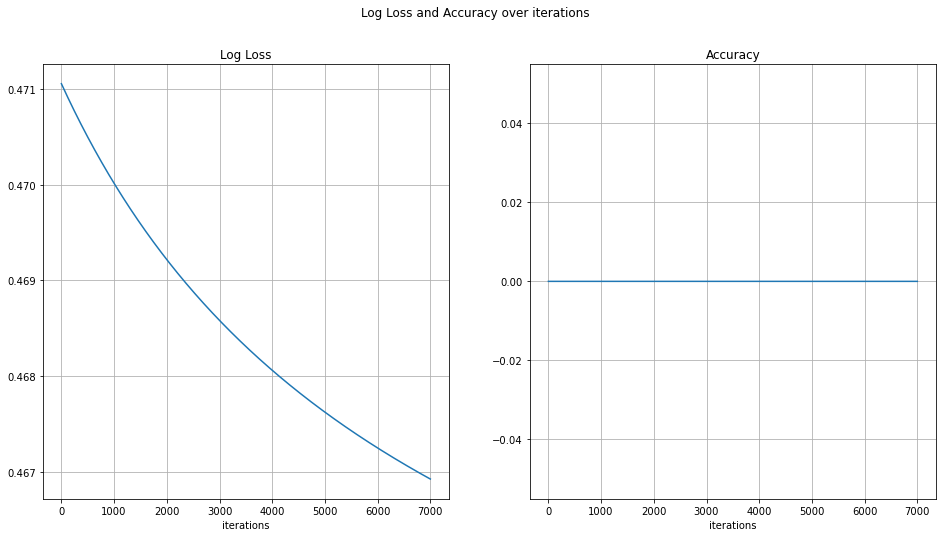

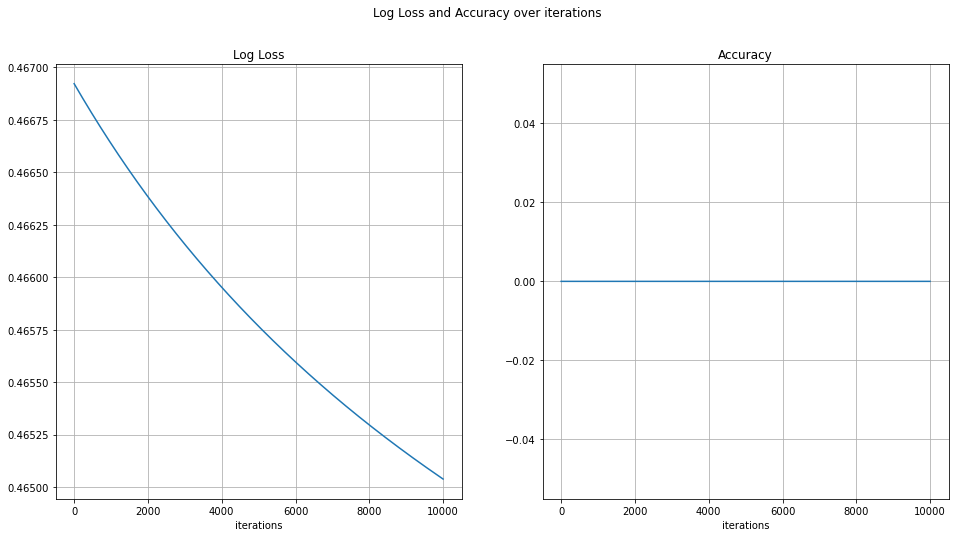

In [24]:
#### Initialize the network parameters
W_1 = W_1_default
W_2 = W_2_default
num_iters = [100,500,1000,3000,7000,10000]
learning_rate = 0.05
x_mat = x_mat_full

for num_iter in num_iters:
    print('--------------------------------')
    print('Numero de iterações: ', num_iter)
    loss_vals, accuracies = [], []
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1,W_2)
        ## Update the weight matrices
        W_1 = W_1 - learning_rate*gradient[0]
        W_2 = W_2 - learning_rate*gradient[1]
        
        ### Compute the loss and accuracy
        accuracy = accuracy_fn(y, y_pred)
        accuracies.append(accuracy)
        
        loss = loss_fn(y, y_pred)
        loss_vals.append(loss)
        
        ## Print the loss and accuracy for every 200th iteration
        if((i+1) % num_iter == 0):
            print("==============================")
            print("It: ", str(i+1))
            print("Loss: ", str(loss))
            print("Accuracy: ", str(accuracy))
        
    plot_loss_accuracy(loss_vals, accuracies)

Ao analisarmos o número de iterações usadas, vimos que com 10000 iterações, numa taxa de aprendizado de 10%, tivemos o melhor resultado dentre os valores experimentados.